In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.feature_selection import SelectKBest, chi2
from operator import itemgetter
import os
import json
import re
import random
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn import preprocessing

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron
# from sklearn.metrics import plot_confusion_matrix
from sklearn import tree
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
import scipy.sparse
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import SGDClassifier
from category_encoders import TargetEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_selection import GenericUnivariateSelect, mutual_info_classif
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
from sklearn.linear_model import LinearRegression,LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import lightgbm as lgb
import xgboost as xgb

import warnings # warnings packagedefine bust size
warnings.filterwarnings('ignore') # hide warnings
%matplotlib inline  
plt.style.use('seaborn')
pd.set_option('display.max_colwidth', None)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/sample.csv
/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/train.csv
/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/test.csv


# **IMPORTING THE DATA**

In [3]:
df = pd.read_csv("/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/train.csv")
X_tar = pd.read_csv("/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/test.csv")
sample = pd.read_csv("/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/sample.csv")

# **EXPLORATORY DATA ANALYSIS (EDA)**

**Let us check the data**

In [4]:
print("TRAIN:", df.shape)
print("TEST:", X_tar.shape)
print(df.info())
print(X_tar.info())
print()
df.tail(3)

TRAIN: (13636, 15)
TEST: (4546, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13636 entries, 0 to 13635
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 13636 non-null  int64 
 1   RecipeNumber       13636 non-null  int64 
 2   RecipeCode         13636 non-null  int64 
 3   RecipeName         13636 non-null  object
 4   CommentID          13636 non-null  object
 5   UserID             13636 non-null  object
 6   UserName           13636 non-null  object
 7   UserReputation     13636 non-null  int64 
 8   CreationTimestamp  13636 non-null  int64 
 9   ReplyCount         13636 non-null  int64 
 10  ThumbsUpCount      13636 non-null  int64 
 11  ThumbsDownCount    13636 non-null  int64 
 12  Rating             13636 non-null  int64 
 13  BestScore          13636 non-null  int64 
 14  Recipe_Review      13634 non-null  object
dtypes: int64(10), object(5)
memory usage: 1.6+ MB
None


,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,Recipe_Review
13633,87,37,20170,Taco Lasagna,sp_aUSaElGf_20170_c_359338,u_1oKbGr5o9tj0mQl1rkVqzWnE481,Barbaralarkin,1,1622718089,0,0,0,5,100,Very tasty!
13634,48,63,24886,Chicken and Dumplings,sp_aUSaElGf_24886_c_175514,u_1oKWD7Dqjmc0oYHdW8Vm3fzhxJW,SammyPrissy,1,1622717192,0,0,0,5,100,I have made this numerous times. It&#39;s so good &amp; easy!
13635,379,3,2832,Cheeseburger Soup,sp_aUSaElGf_2832_c_278956,u_1oKYPsERQ0GvUcjIsuAxzmnsQGW,morgantowndan,1,1622717703,0,0,0,5,100,Super. I added 1/2 lb chopped bacon to mine. Have some xtra chicken broth in case you want it more soupy. Great recipe....will make many times over!


**DATA STATISTICS**

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,13636.0,1.210853e+02,1.169956e+02,0.000000e+00,4.500000e+01,9.100000e+01,1.480000e+02,7.240000e+02
RecipeNumber,13636.0,3.862438e+01,2.967235e+01,1.000000e+00,1.200000e+01,3.300000e+01,6.300000e+01,1.000000e+02
RecipeCode,13636.0,2.178599e+04,2.388319e+04,3.860000e+02,6.504000e+03,1.460000e+04,3.312100e+04,1.917750e+05
UserReputation,13636.0,2.160311e+00,1.008642e+01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.100000e+02
CreationTimestamp,13636.0,1.623713e+09,5.444020e+06,1.613035e+09,1.622717e+09,1.622718e+09,1.622718e+09,1.665756e+09
ReplyCount,13636.0,1.452039e-02,1.373234e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00
ThumbsUpCount,13636.0,1.098269e+00,4.166487e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.000000e+01
ThumbsDownCount,13636.0,5.437078e-01,3.265660e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.260000e+02
Rating,13636.0,4.288721e+00,1.544839e+00,0.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00
BestScore,13636.0,1.531279e+02,1.409869e+02,0.000000e+00,1.000000e+02,1.000000e+02,1.000000e+02,9.460000e+02


**Key Points**
* **The data has 14 features and 1 target variable.**
* **CommentID is unique for all data items so Useless.**
* **There are one datetime feature of type object which will be used to extract the day and time info.(feature engineering)**
* **There are 2 text features (Recipe_Review & RecipeName)**
* **RecipeNumber & RecipeCode & RecipeName Refers to same Dish so need to use any 1 of 3.**

# 1. # **Data Visualization**

array([[<Axes: title={'center': 'ID'}>,
        <Axes: title={'center': 'RecipeNumber'}>,
        <Axes: title={'center': 'RecipeCode'}>],
       [<Axes: title={'center': 'UserReputation'}>,
        <Axes: title={'center': 'CreationTimestamp'}>,
        <Axes: title={'center': 'ReplyCount'}>],
       [<Axes: title={'center': 'ThumbsUpCount'}>,
        <Axes: title={'center': 'ThumbsDownCount'}>,
        <Axes: title={'center': 'Rating'}>],
       [<Axes: title={'center': 'BestScore'}>, <Axes: >, <Axes: >]],
      dtype=object)

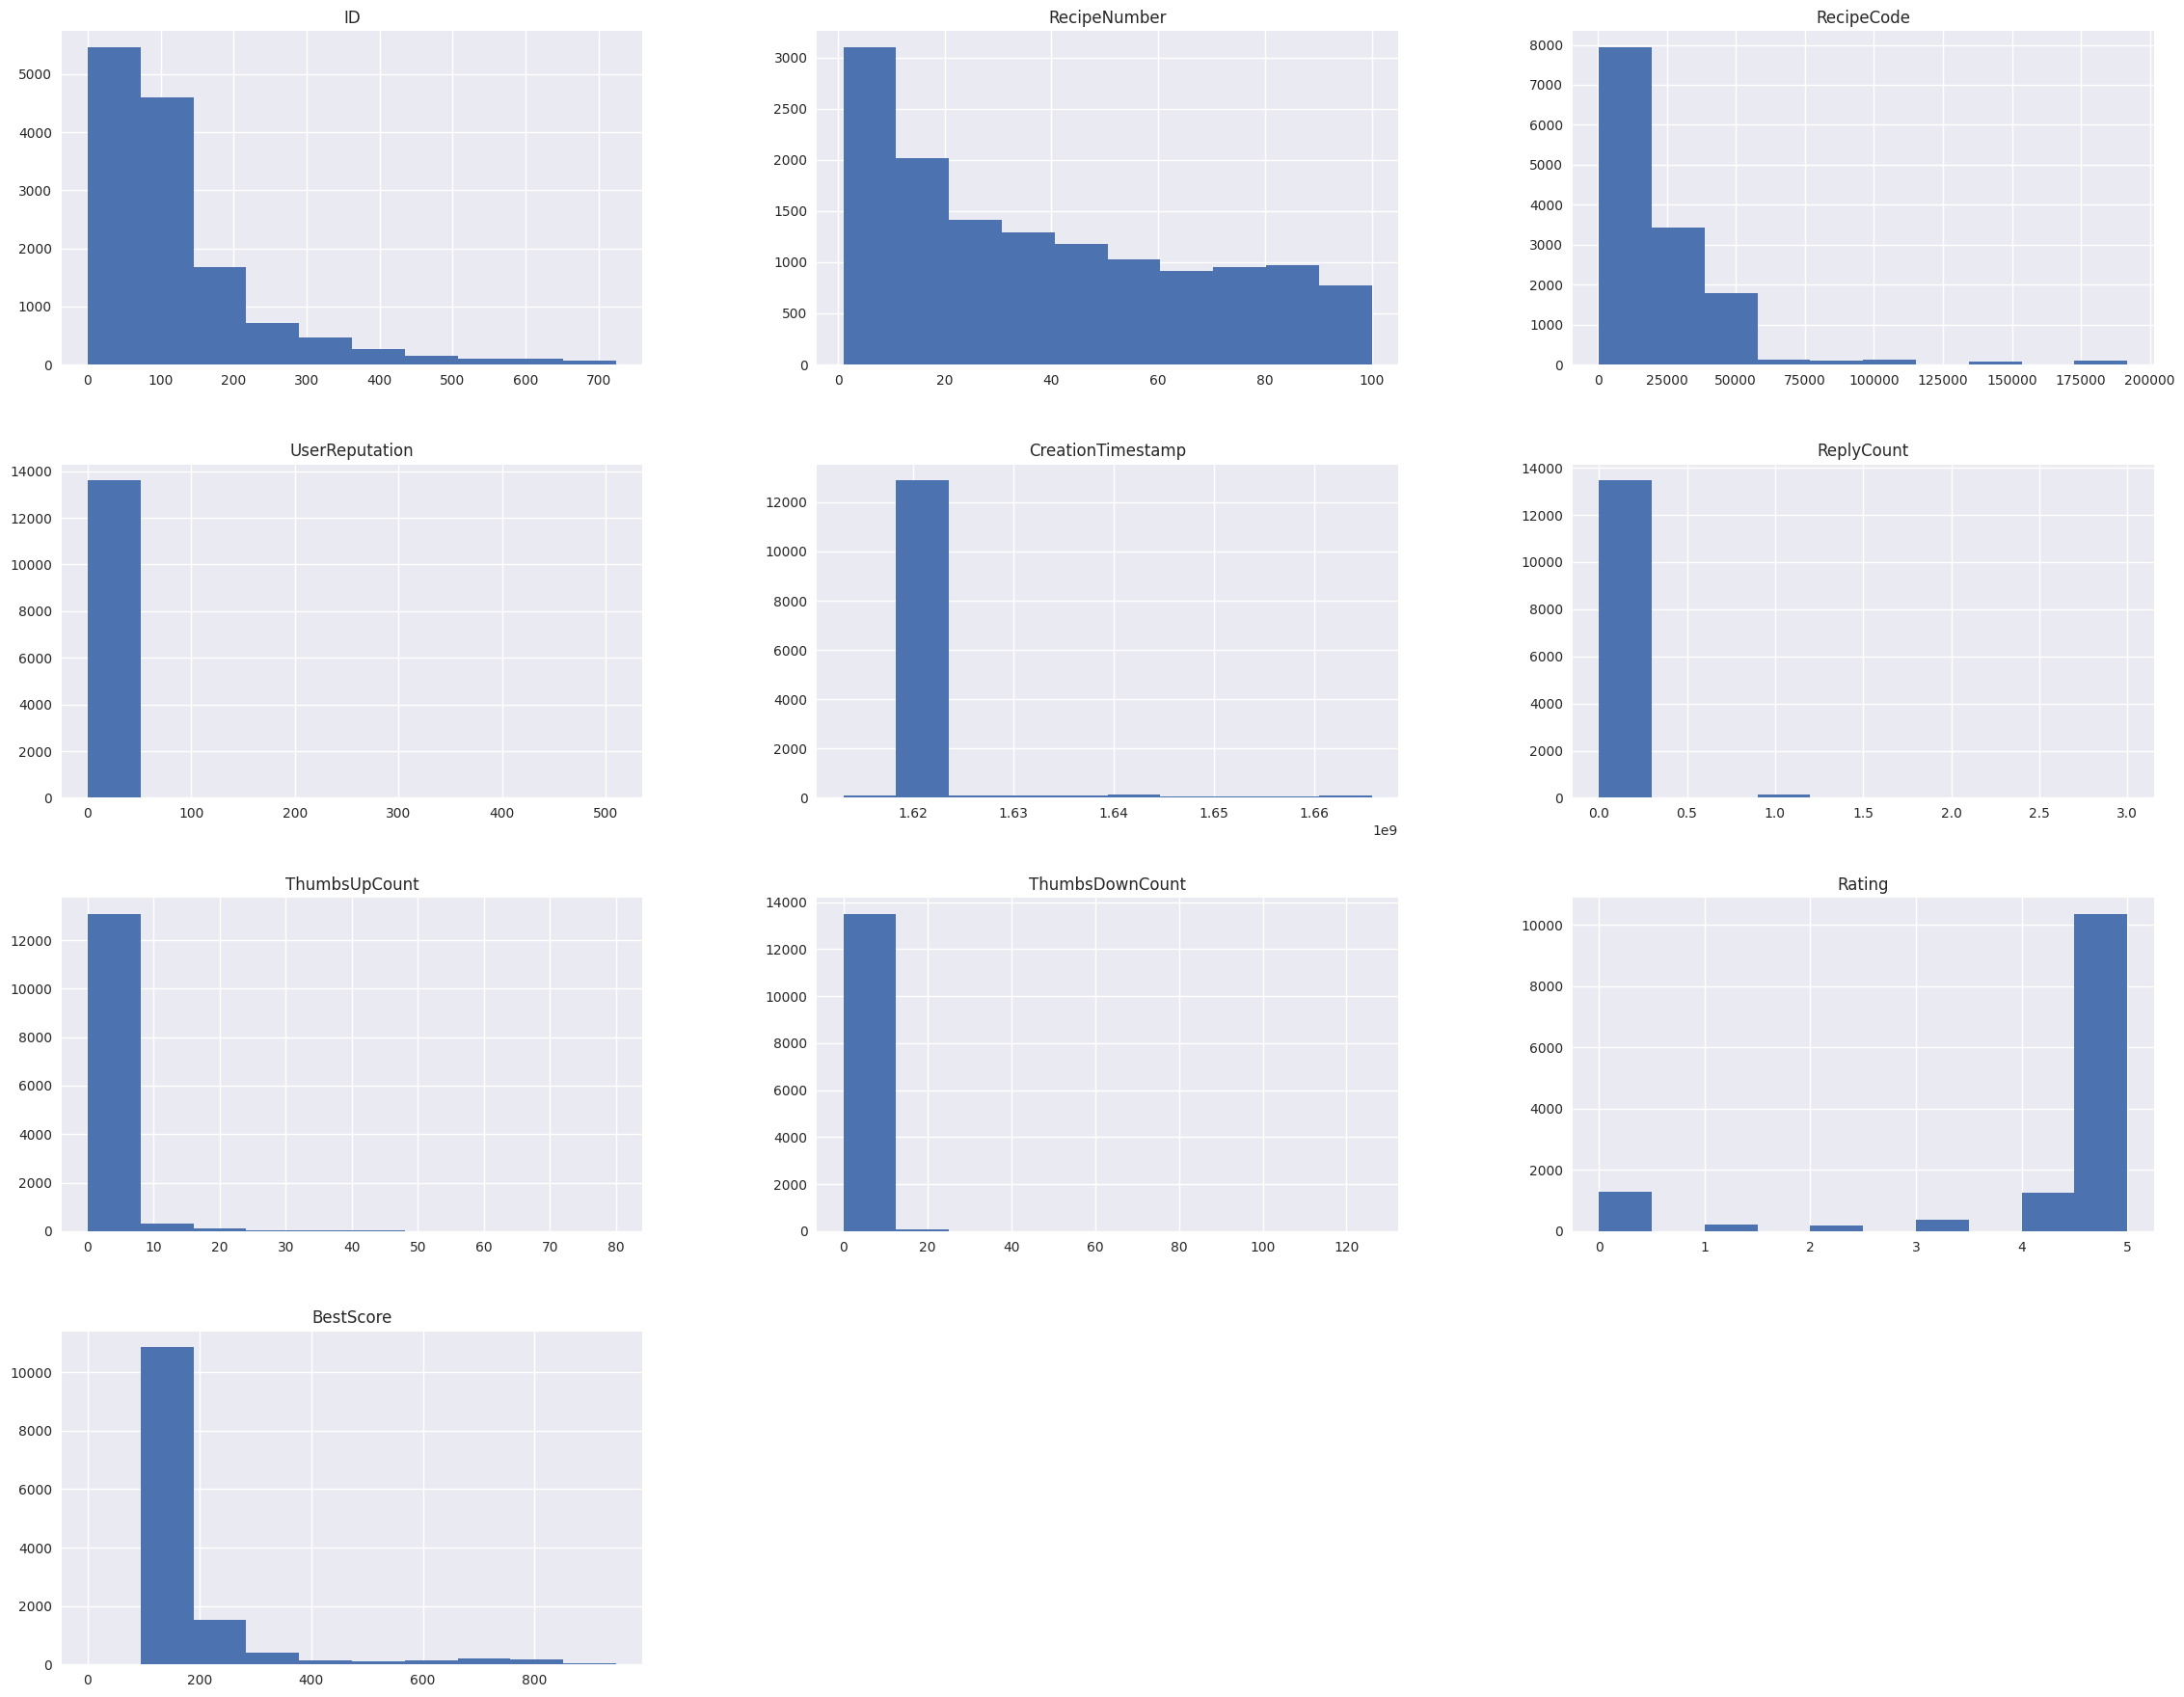

In [ ]:
df.hist(figsize=(28,22))

In [7]:
print("Empty text cells: ",(df == '?').any().any())

df.replace('?',np.nan,inplace = True)
X_tar.replace('?',np.nan,inplace = True)
print(df.isnull().sum())
df = df.dropna()
print()
print(df.isnull().sum())

Empty text cells:  False
ID                   0
RecipeNumber         0
RecipeCode           0
RecipeName           0
CommentID            0
UserID               0
UserName             0
UserReputation       0
CreationTimestamp    0
ReplyCount           0
ThumbsUpCount        0
ThumbsDownCount      0
Rating               0
BestScore            0
Recipe_Review        2
dtype: int64

ID                   0
RecipeNumber         0
RecipeCode           0
RecipeName           0
CommentID            0
UserID               0
UserName             0
UserReputation       0
CreationTimestamp    0
ReplyCount           0
ThumbsUpCount        0
ThumbsDownCount      0
Rating               0
BestScore            0
Recipe_Review        0
dtype: int64


In [8]:
print("No. of Unique Values : ")
print(df.nunique())
print()
print(df['ReplyCount'].value_counts())
print()
print(df['Rating'].value_counts())
print()

No. of Unique Values : 
ID                     701
RecipeNumber           100
RecipeCode             100
RecipeName             100
CommentID            13634
UserID               10782
UserName             10619
UserReputation          20
CreationTimestamp     2422
ReplyCount               4
ThumbsUpCount           57
ThumbsDownCount         51
Rating                   6
BestScore              525
Recipe_Review        13370
dtype: int64

ReplyCount
0    13462
1      151
2       16
3        5
Name: count, dtype: int64

Rating
5    10369
0     1272
4     1241
3      368
1      210
2      174
Name: count, dtype: int64



<Axes: >

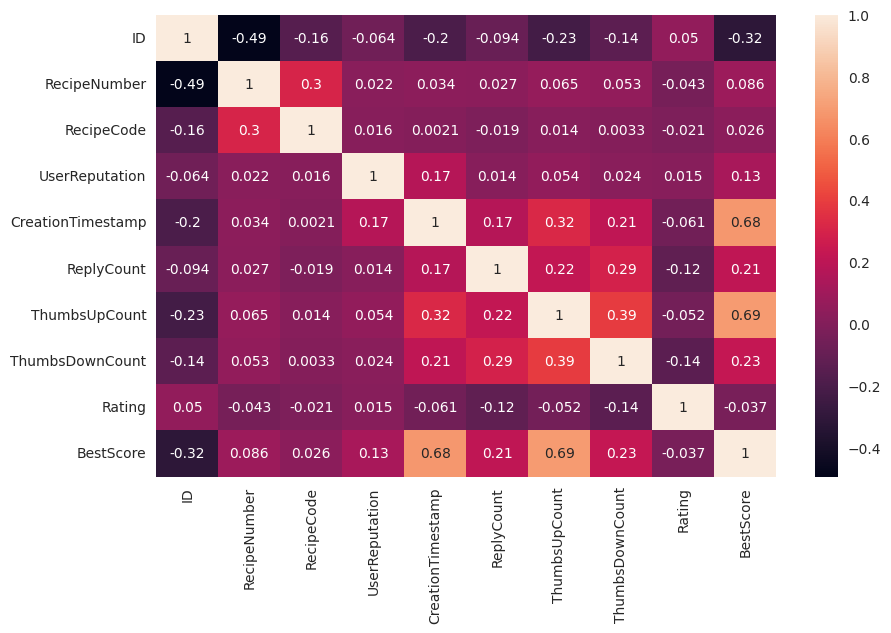

In [9]:
numeric = df.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = df[numeric].corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot= True)

**SEPARATING THE TARGET COLUMN DATA AND FEATURES DATA**

<class 'pandas.core.frame.DataFrame'>
Index: 13634 entries, 0 to 13635
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   RecipeNumber       13634 non-null  int64 
 1   RecipeName         13634 non-null  object
 2   UserID             13634 non-null  object
 3   UserReputation     13634 non-null  int64 
 4   CreationTimestamp  13634 non-null  int64 
 5   ReplyCount         13634 non-null  int64 
 6   ThumbsUpCount      13634 non-null  int64 
 7   ThumbsDownCount    13634 non-null  int64 
 8   BestScore          13634 non-null  int64 
 9   Recipe_Review      13634 non-null  object
dtypes: int64(7), object(3)
memory usage: 1.1+ MB
None


<Axes: ylabel='Density'>

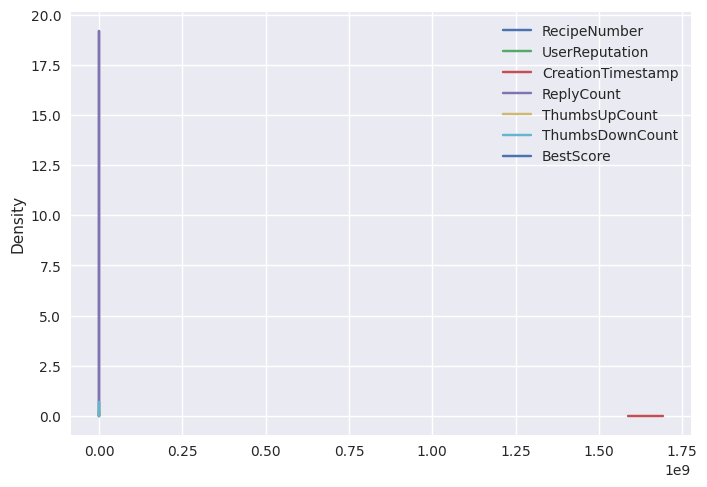

In [10]:
d = df.drop(['ID', 'UserName', 'CommentID','RecipeCode'], axis=1)
y = d['Rating']
X = d.drop("Rating", axis=1)

print(X.info())

X.plot.kde()

**KEY POINTS**
* **Recipe_Review has 2 missing values.**
* **ID, UserName, CommentID, RecipeCode are useless features as they are unique for all data items**
* **The Rating has 6 classes i.e 0,1,2,3,4,5**
* **BestScore has strong positive corelation with CreationTimestamp, ThumbsUpCount.**

# 2. # DATA PREPROCESSING

# Splitting of Dataset into train and test data

In [11]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size = 0.20,random_state = 25)

In [46]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_resample(X_tr, ytrain.ravel()) 
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 

print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0))) 
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '2': {}".format(sum(y_train_res == 2))) 
print("After OverSampling, counts of label '3': {}".format(sum(y_train_res == 3)))
print("After OverSampling, counts of label '4': {}".format(sum(y_train_res == 4))) 
print("After OverSampling, counts of label '5': {}".format(sum(y_train_res == 5)))

After OverSampling, the shape of train_X: (49854, 10194)
After OverSampling, the shape of train_y: (49854,) 

After OverSampling, counts of label '0': 8309
After OverSampling, counts of label '1': 8309
After OverSampling, counts of label '2': 8309
After OverSampling, counts of label '3': 8309
After OverSampling, counts of label '4': 8309
After OverSampling, counts of label '5': 8309


In [ ]:
# from sklearn.model_selection import StratifiedKFold

# skfolds = StratifiedKFold(n_splits=3)
# splits = skfolds.split(x, y)
# for i, (train_index, test_index) in enumerate(splits):  
#   x_train_strat = X[train_index]
#   y_train = y[train_index]
#   x_test_strat  = X[test_index]
#   y_test  = y[test_index]

In [12]:
df['CreationTimestamp'] = pd.to_datetime(df['CreationTimestamp'],unit='s', errors='coerce')
df['day'] = df['CreationTimestamp'].dt.day_of_week
df['time'] = df['CreationTimestamp'].dt.hour
df['minutes'] = df['CreationTimestamp'].dt.minute

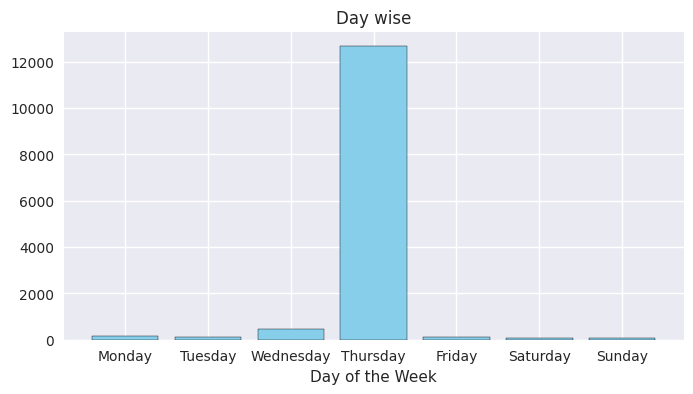

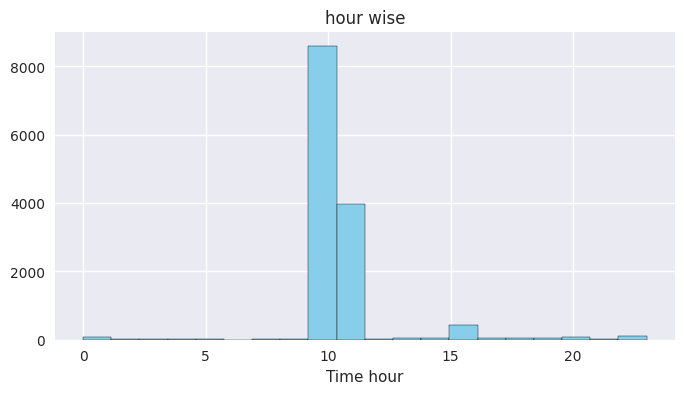

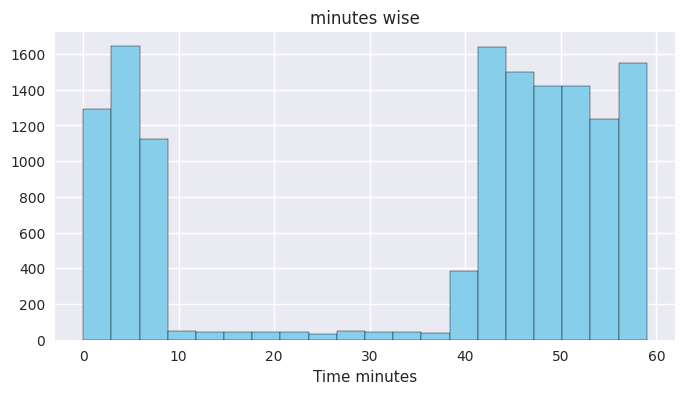

In [13]:
# Visualizing by day
plt.figure(figsize=(8, 4))
plt.hist(df['day'], bins=7, range=[0, 7], align='left', rwidth=0.8, color='skyblue', edgecolor='black')
plt.title('Day wise')
plt.xlabel('Day of the Week')
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show()

# Visualizing by hour
plt.figure(figsize=(8, 4))
plt.hist(df['time'], bins=20, color='skyblue', edgecolor='black')
plt.title('hour wise')
plt.xlabel('Time hour')
plt.show()


# Visualizing by minutes
plt.figure(figsize=(8, 4))
plt.hist(df['minutes'], bins=20, color='skyblue', edgecolor='black')
plt.title('minutes wise')
plt.xlabel('Time minutes')
plt.show()

In [14]:
df=df.drop(['minutes','time','day'],axis=1)

> * **Most of the rating were posted on (thursday).**
> * **Morning time is busiest. 10-11am are peak hours.**
> * **No outliers in datset.**

**ENCODING CATEGORICAL FEATURE (UserID) AND SCALING NUMERICAL FEATURES**

Models like Logistic regression needs numerical features scaling

<Axes: ylabel='Density'>

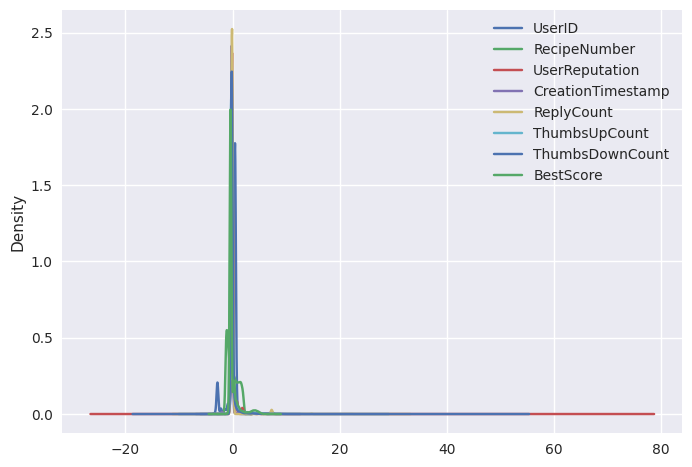

In [15]:
cat_features=['UserID']
num_features=['RecipeNumber', 'UserReputation', 'CreationTimestamp' ,'ReplyCount', 'ThumbsUpCount', 'ThumbsDownCount', 'BestScore']
column_tranformer = ColumnTransformer(
    [
        ('Target encoding', TargetEncoder(), cat_features),
        ('passthrough', 'passthrough', num_features),
    ], remainder='drop'
)

ct = Pipeline([
    ('ct', column_tranformer),
    ('standard_scaling', StandardScaler())
])

Xtrain_ct = pd.DataFrame(ct.fit_transform(Xtrain,ytrain) , columns=cat_features+num_features) 
Xtest_ct = pd.DataFrame(ct.transform(Xtest), columns=cat_features+num_features)

Xtrain_ct.plot.kde()

Preprocessing by SVD

In [16]:
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.decomposition import TruncatedSVD

# # Assuming Xtrain is your DataFrame containing the training data

# num_features = ['RecipeNumber', 'UserReputation', 'CreationTimestamp', 'ReplyCount', 'ThumbsUpCount', 'ThumbsDownCount', 'BestScore']

# recipe_review_pipe = Pipeline([
#     ('tdidf', TfidfVectorizer(stop_words='english', tokenizer=custom_tokenizer)),
#     ('svd', TruncatedSVD(n_components=100, n_iter=100, random_state=42))
# ])

# recipe_name_pipe = Pipeline([
#     ('tdidf', TfidfVectorizer(stop_words='english', tokenizer=custom_tokenizer)),
#     ('svd', TruncatedSVD(n_components=50, n_iter=100, random_state=42))
# ])

# # Use ColumnTransformer to combine text and numerical features
# ct = ColumnTransformer(
#     transformers=[
#         ('Target encoding', TargetEncoder(), ['UserID']),
#         ('num_features', StandardScaler(), num_features),
#         ('recipe_name_pipe', recipe_name_pipe, 'RecipeName'),
#         ('recipe_review', recipe_review_pipe, 'Recipe_Review')   
#     ]
# )

# X_train = pd.DataFrame(ct.fit_transform(Xtrain,ytrain))
# X_test = pd.DataFrame(ct.transform(Xtest))
# X_train

**ENCODING TEXT FEATURE (RecipeName,Recipe_Review) BY TFIDF VECTORIZER**

Models like Logistic regression needs numerical features scaling

In [17]:
tfidf_vectorizer_name = TfidfVectorizer(stop_words='english')
recipe_name_tfidf = tfidf_vectorizer_name.fit_transform(df['RecipeName'])

# Initialize TfidfVectorizer for 'Recipe_Review'
tfidf_vectorizer_review = TfidfVectorizer(stop_words='english')
recipe_review_tfidf = tfidf_vectorizer_review.fit_transform(df['Recipe_Review'])

# Convert the sparse matrices to DataFrames
recipe_name_tfidf_df = pd.DataFrame(recipe_name_tfidf.toarray(), columns=tfidf_vectorizer_name.get_feature_names_out(), index=df.index)
recipe_review_tfidf_df = pd.DataFrame(recipe_review_tfidf.toarray(), columns=tfidf_vectorizer_review.get_feature_names_out(), index=df.index)


# Display the TF-IDF DataFrames
print(recipe_name_tfidf_df.shape,"TF-IDF for RecipeName:")
print(recipe_name_tfidf_df)

print(recipe_review_tfidf_df.shape,"\nTF-IDF for Recipe_Review:")
print(recipe_review_tfidf_df)

(13634, 180) TF-IDF for RecipeName:
       amish  apple  asian   au  bacon  baked    banana      bars  basic  \
0        0.0    0.0    0.0  0.0    0.0    0.0  0.362675  0.417957    0.0   
1        0.0    0.0    0.0  0.0    0.0    0.0  0.000000  0.000000    0.0   
2        0.0    0.0    0.0  0.0    0.0    0.0  0.000000  0.000000    0.0   
3        0.0    0.0    0.0  0.0    0.0    0.0  0.000000  0.000000    0.0   
4        0.0    0.0    0.0  0.0    0.0    0.0  0.000000  0.000000    0.0   
...      ...    ...    ...  ...    ...    ...       ...       ...    ...   
13631    0.0    0.0    0.0  0.0    0.0    0.0  0.000000  0.000000    0.0   
13632    0.0    0.0    0.0  0.0    0.0    0.0  0.000000  0.000000    0.0   
13633    0.0    0.0    0.0  0.0    0.0    0.0  0.000000  0.000000    0.0   
13634    0.0    0.0    0.0  0.0    0.0    0.0  0.000000  0.000000    0.0   
13635    0.0    0.0    0.0  0.0    0.0    0.0  0.000000  0.000000    0.0   

       bean  ...  tilapia  toast  tortellini  tradi

**SELECTING k BEST TOKENS OF TFIDF VECTORIZER**

To reduce model training time and remove useless words

In [18]:
def get_top_k_features_and_scores(feature_df, y, k=None):
    if k is None:
        k = feature_df.shape[1]  # Use all features if k is not specified
    
    selector = SelectKBest(chi2, k=k).fit(feature_df, y)
    feature_cols = selector.get_support(indices=True)
    selected_scores = itemgetter(*feature_cols)(selector.scores_)
    
    top_k_df = pd.DataFrame({'Token': feature_df.columns[feature_cols],
                             'Score': selected_scores})
    
    top_k_df = top_k_df.sort_values(by='Score', ascending=False)
    
    # Include the top-k features in the original DataFrame
    top_k_features_df = feature_df.iloc[:, feature_cols]
    
    return top_k_df, top_k_features_df

# Get top features and scores for recipe_name_tfidf_df
top_name_df, top_name_features_df = get_top_k_features_and_scores(recipe_name_tfidf_df, y)

# Get top features and scores for recipe_review_tfidf_df
top_review_df, top_review_features_df = get_top_k_features_and_scores(recipe_review_tfidf_df, y)

# Display the results
print("Top Features and Scores for recipe_name_tfidf_df:")
print(top_name_df)

print("\nTop Features and Scores for recipe_review_tfidf_df:")
print(top_review_df)

Top Features and Scores for recipe_name_tfidf_df:
         Token       Score
116     orange  135.185241
93         key   99.000962
97        lime   73.894367
125  pineapple   70.487452
124        pie   35.919915
..         ...         ...
39   chocolate    0.910024
114    oatmeal    0.753505
152    skillet    0.621105
149   shepherd    0.621105
38        chip    0.280743

[180 rows x 2 columns]

Top Features and Scores for recipe_review_tfidf_df:
            Token       Score
6249         okay  198.938687
6248           ok  182.816524
1116        bland  158.383855
858         awful  157.661539
9783        waste  147.181254
...           ...         ...
9937       wisdom    0.027611
6641  personalize    0.027611
8073   siddhartha    0.027611
1916     clucking    0.027611
3111    economics    0.027611

[10194 rows x 2 columns]


**COMBINING SCALED FEATURES AND ENCODED TEXT FEATURES**

In [19]:
# Concatenate top_name_features_df and top_review_features_df horizontally
corpus = np.hstack([ top_review_features_df])

# Split the corpus into training and testing sets
corpus_train, corpus_test = train_test_split(corpus, test_size=0.20, random_state=25)

# Concatenate Xtrain_ct with the training corpus using hstack
X_tr = np.hstack([corpus_train])

# Concatenate Xtest_ct with the testing corpus using hstack
X_te = np.hstack([corpus_test])

In [20]:
X_target = X_tar.drop(['ID', 'UserName', 'CommentID','RecipeCode'], axis=1)
X_target_ct = pd.DataFrame(ct.transform(X_target))
recipe_name_target_tfidf = tfidf_vectorizer_name.transform(X_target['RecipeName'])
recipe_review_target_tfidf = tfidf_vectorizer_review.transform(X_target['Recipe_Review'])
X_recipe_name_target_tf = pd.DataFrame(recipe_name_target_tfidf.toarray(), columns=tfidf_vectorizer_name.get_feature_names_out(), index=X_target.index)
X_recipe_review_target_tf = pd.DataFrame(recipe_review_target_tfidf.toarray(), columns=tfidf_vectorizer_review.get_feature_names_out(), index=X_target.index)
target_corpus = np.hstack([ X_recipe_review_target_tf])
X_target_final = np.hstack([target_corpus])

In [21]:
print(X_tr.shape)
print(ytrain.shape)
print(X_te.shape)
print(ytest.shape)
print(X_target_final.shape)

(10907, 10194)
(10907,)
(2727, 10194)
(2727,)
(4546, 10194)


# 3. # **TRAINING AND TESTING THE MODELS**

# MODEL 1 - LOGISTIC REGRESSOR

In [47]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_tr,ytrain)
print('Training Score:',lr.score(X_tr,ytrain)) 
yperd = lr.predict(X_te)
print('Test Score:',lr.score(X_te,ytest)) 

Training Score: 0.799394884019437
Test Score: 0.7616428309497616


**Incorrect Classified Ratings**

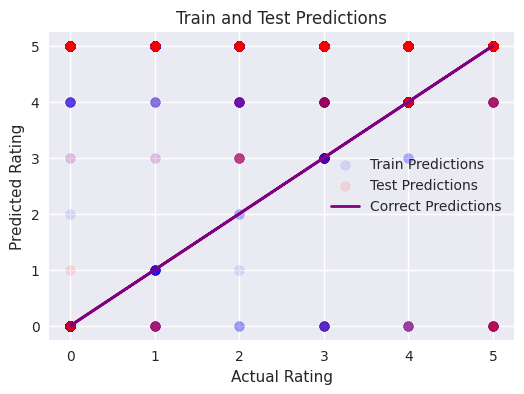

In [48]:
plt.figure(figsize=(6, 4))
plt.scatter(ytrain, lr.predict(X_tr), color='blue', label='Train Predictions', alpha=0.1)
plt.scatter(ytest, lr.predict(X_te), color='red', label='Test Predictions', alpha=0.1)
plt.plot(ytest, ytest, color='purple', label='Correct Predictions', linewidth=2)
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('Train and Test Predictions')
plt.legend()
plt.show()

In [24]:
# print(classification_report(ytest,ypred)) 
# print(ConfusionMatrixDisplay.from_predictions(ytest,ypred))

**Hyperparameter Tuning**

In [25]:
# params = {'penalty':['l2'],'fit_intercept':[True],
#           'solver':['saga'],
#           'max_iter':[100,400],
#           'multi_class':['auto','multinomial'],
#           'warm_start':[True]}

# lr_gc = GridSearchCV(lr,params,cv=3)
# lr_gc.fit(X_tr,ytrain) 
# print(lr_gc.best_params_)
# print('Training Score:',lr_gc.score(X_tr,ytrain))
# print('Testing Score:',lr_gc.score(X_te,ytest))

# MODEL 2 - Ridge Classifier

In [26]:
# from sklearn.linear_model import RidgeClassifier
# r=RidgeClassifier()
# r.fit(X_tr,ytrain)
# print('Training Score:',r.score(X_tr,ytrain)) 
# yperd = r.predict(X_te)
# print('Test Score:',r.score(X_te,ytest)) 

**Incorrect Classified Ratings**

In [27]:
# plt.figure(figsize=(6,4))
# plt.scatter(ytrain, r.predict(X_tr), color='blue', label='Train Predictions', alpha=0.1)
# plt.scatter(ytest, r.predict(X_te), color='red', label='Test Predictions', alpha=0.1)
# plt.plot(ytest, ytest, color='purple', label='Correct Predictions', linewidth=2)
# plt.xlabel('Actual Rating')
# plt.ylabel('Predicted Rating')
# plt.title('Train and Test Predictions')
# plt.legend()
# plt.show()

In [28]:
# print(classification_report(ytest,ypred)) 
# print(ConfusionMatrixDisplay.from_predictions(ytest,ypred))

**Hyperparameter Tuning**

In [29]:
# params = {
#     'alpha': [1.0, 0.1, 0.01],
#     'fit_intercept': [True],
#     'solver': ['saga'],
#     'max_iter': [100, 400],
#     'normalize': [True, False],
#     'class_weight': [None, 'balanced']
# }

# r_gc = GridSearchCV(r,params,cv=3)
# r_gc.fit(X_tr,ytrain) 
# print(lr_gc.best_params_)
# print('Training Score:',lr_gc.score(X_tr,ytrain))
# print('Testing Score:',lr_gc.score(X_te,ytest))

# MODEL 3 - Random Forest Classifier

In [30]:
# from sklearn.ensemble import RandomForestClassifier
# rf = RandomForestClassifier(bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100)
# rf.fit(X_tr,ytrain)
# print('Training Score:',rf.score(X_tr,ytrain)) 
# yperd = rf.predict(X_te)
# print('Test Score:',rf.score(X_te,ytest)) 

**Incorrect Classified Ratings**

In [31]:
# plt.figure(figsize=(6,4))
# plt.scatter(ytrain, rf.predict(X_tr), color='blue', label='Train Predictions', alpha=0.1)
# plt.scatter(ytest, rf.predict(X_te), color='red', label='Test Predictions', alpha=0.1)
# plt.plot(ytest, ytest, color='purple', label='Correct Predictions', linewidth=2)
# plt.xlabel('Actual Rating')
# plt.ylabel('Predicted Rating')
# plt.title('Train and Test Predictions')
# plt.legend()
# plt.show()

In [32]:
# print(classification_report(ytest,ypred)) 
# print(ConfusionMatrixDisplay.from_predictions(ytest,ypred))

**Hyperparameter Tuning**

In [33]:
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'bootstrap': [True, False]
# }

# rf_gc = GridSearchCV(rf,params,cv=3)
# rf_gc.fit(X_tr,ytrain) 
# print(rf_gc.best_params_)
# print('Training Score:',rf_gc.score(X_tr,ytrain))
# print('Testing Score:',rf_gc.score(X_te,ytest))

# MODEL 4 - SGD CLASSIFIER

In [34]:
# penalty = 'l2'
# alpha = 0.001

# # Model
# log  = SGDClassifier(loss = "log",
#                                    penalty = penalty,
#                                    alpha = alpha,
#                                    max_iter=5000, 
#                                    tol=1e-3,
#                                    random_state = 1)
# # Fit Mode
# log.fit(X_tr,ytrain)

# # make predictions
# ypred = log.predict(X_te)
# # evaluate predictions
# acc = accuracy_score(ytest, ypred)

# MODEL 5 - LIGHT BOOST (BEST)

In [35]:
import lightgbm as lgb
# 'learning_rate': 0.1, 'max_depth': 7, 'num_leaves': 31
clf = lgb.LGBMClassifier(**{'verbose':-1})
clf.fit(X_tr, ytrain)
print('Training Score:',clf.score(X_tr,ytrain)) 
ypred = clf.predict(X_te)
print('Test Score:',clf.score(X_te,ytest)) 

Training Score: 0.9123498670578527
Test Score: 0.7697103043637697


**Incorrect Classified Ratings**

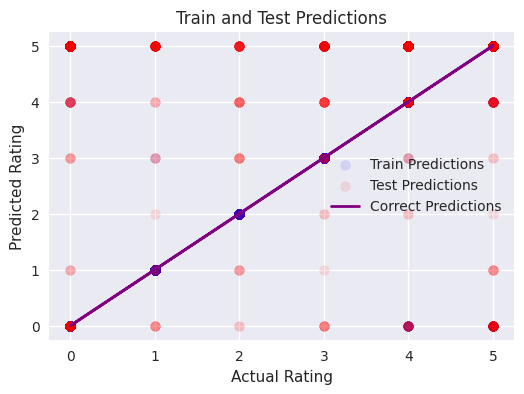

In [36]:
plt.figure(figsize=(6,4))
plt.scatter(ytrain, clf.predict(X_tr), color='blue', label='Train Predictions', alpha=0.1)
plt.scatter(ytest, clf.predict(X_te), color='red', label='Test Predictions', alpha=0.1)
plt.plot(ytest, ytest, color='purple', label='Correct Predictions', linewidth=2)
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('Train and Test Predictions')
plt.legend()
plt.show()

              precision    recall  f1-score   support

           0       0.44      0.14      0.21       257
           1       0.32      0.13      0.19        45
           2       0.33      0.07      0.12        42
           3       0.33      0.11      0.17        80
           4       0.40      0.14      0.20       243
           5       0.80      0.98      0.88      2060

    accuracy                           0.77      2727
   macro avg       0.44      0.26      0.29      2727
weighted avg       0.70      0.77      0.71      2727



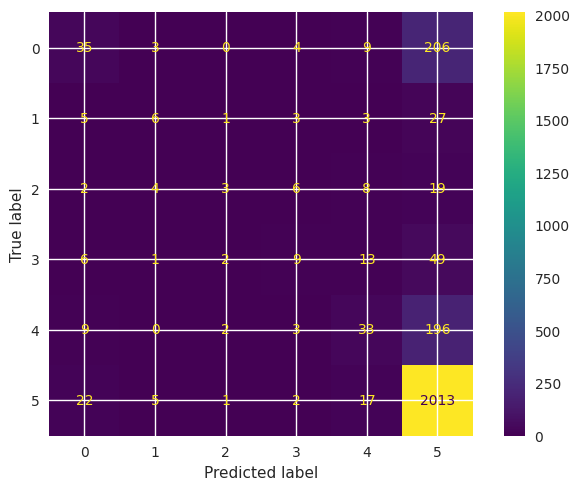

In [37]:
print(classification_report(ytest,ypred)) 
print(ConfusionMatrixDisplay.from_predictions(ytest,ypred))

**Hyperparameter Tuning**

In [38]:
# from sklearn.model_selection import KFold, GridSearchCV

# param_grid = {
#     'num_leaves': [31, 50, 100],
#     'learning_rate': [0.05, 0.1, 0.2],
#     'max_depth': [3, 5, 7],
#     'verbose':[-1]
# }

# base_model = lgb.LGBMClassifier()

# grid_search = GridSearchCV(base_model, param_grid, cv=5, scoring='accuracy')
# grid_search.fit(X_tr, ytrain)

# # Get the best hyperparameters
# best_params = grid_search.best_params_

# Train a new LightGBM model with the optimal hyperparameters
# best_model = lgb.LGBMClassifier(**best_params)
# best_model.fit(X_tr, ytrain)
# print("Best Params: ",best_params)
# print('Train LightGBM Model accuracy score',accuracy_score(ytrain, best_model.predict(X_tr)))
# print('Test LightGBM Model accuracy score: ',accuracy_score(ytest, best_model.predict(X_te)))

# MODEL 6 - XGBOOST

In [39]:
# import xgboost as xgb

# xgb_model = xgb.XGBClassifier(objective="multi:softmax", num_class=len(np.unique(ytrain)))

# xgb_model.fit(X_tr, ytrain)
# print('Training Score:',xgb_model.score(X_tr,ytrain)) 
# ypred = xgb_model.predict(X_te)
# print('Test Score:',xgb_model.score(X_te,ytest)) 

**Incorrect Classified Ratings**

In [40]:
# print(classification_report(ytest,ypred)) 
# print(ConfusionMatrixDisplay.from_predictions(ytest,ypred))

# MODEL COMPARISION

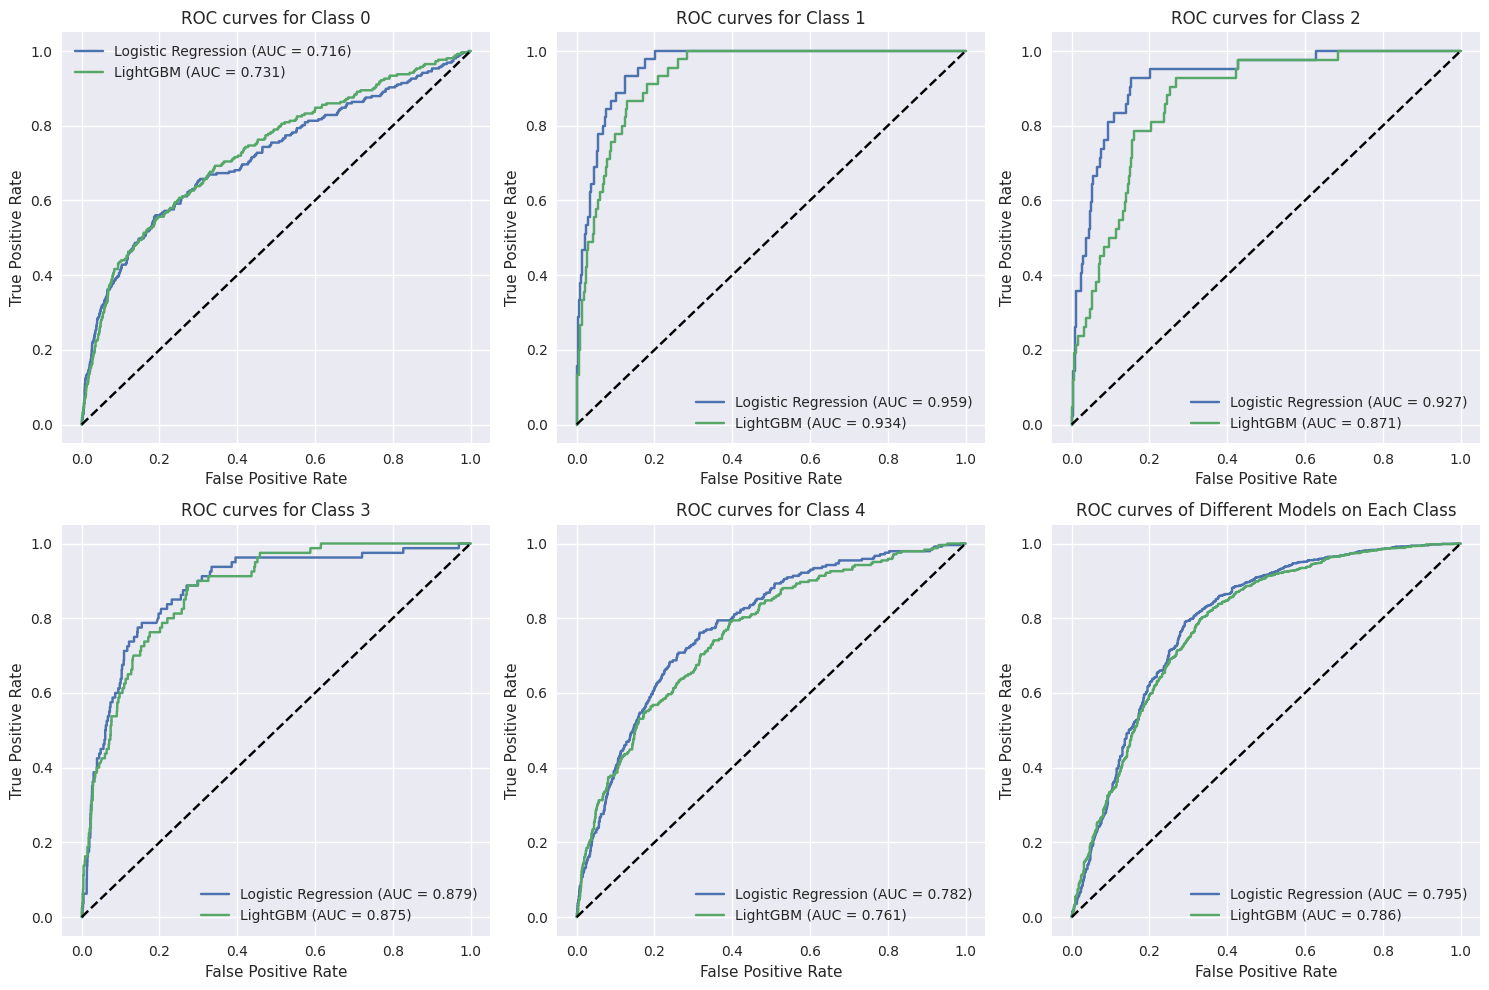

In [50]:
classes=[0, 1, 2, 3, 4, 5]
# Convert the labels to binary format
y_bin = label_binarize(ytest, classes=[0, 1, 2, 3, 4, 5])

# Define the models and pre-train them
models = {
    'Logistic Regression': lr,
#     'SVM rbf': SVC(kernel='rbf', probability=True).fit(X_tr, ytrain),
    # 'SVM linear': SVC(kernel='linear', probability=True).fit(X_tr, ytrain),
    # 'KNN': KNeighborsClassifier(n_neighbors=3).fit(X_tr, ytrain),
    # 'Decision Tree': DecisionTreeClassifier().fit(X_tr, ytrain),
#     'Random Forest': rf,
#     'SGD Classifier':log,
    # 'Naive Bayes': GaussianNB().fit(X_tr, ytrain),
    'LightGBM': clf,
    # 'XGBoost': xgb.XGBClassifier().fit(X_tr, ytrain),
}

# Create a plot for each class
plt.figure(figsize=(15, 10))

for i in range(len(classes)):
    plt.subplot(2, 3, i + 1)  # Subplot for each class

    for model_name, model in models.items():
        y_pred_prob = model.predict_proba(X_te)

        fpr, tpr, _ = roc_curve(y_bin[:, i], y_pred_prob[:, i])
        roc_auc = auc(fpr, tpr)

        # Plot ROC curve for each model and class
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.3f})')

    # Set labels and title for each subplot
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC curves for Class {classes[i]}')
    plt.legend(loc='best')

plt.title('ROC curves of Different Models on Each Class')
plt.tight_layout()
plt.show()

# FINAL SUBMISSION TO COMPETITION

**Retraining Best Model with complete Dataset of Train.csv**

In [ ]:
x,y=np.concatenate((X_tr, X_te), axis=0),np.concatenate((ytrain, ytest), axis=0)
clf.fit(x, y)
print('Training Score:',clf.score(x,y))

In [ ]:
ypred=clf.predict(x)
print(classification_report(y,ypred)) 
print(ConfusionMatrixDisplay.from_predictions(y,ypred))

**Creating Submission.csv**

In [ ]:
y_pred=clf.predict(X_target_final)
submission = pd.DataFrame({"ID": range(1,4547),
"Rating": y_pred})
submission.to_csv('submission.csv',index=False)